In [ ]:
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

In [30]:
df=pd.read_csv(f'C:/Users/lenovo/Desktop/Nature Food-SSB_consumption/高温天气含糖饮料摄入分析/project_05_01/processed_data/chain_store_data/cities.csv',parse_dates=['dt'],index_col=['dt'])
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df=df[df['MAX']>=21]
bins1 = [0,22,24,26,28,30,32,34,36,38,50]
groups1=['<22℃', '22-24℃', '24-26℃','26-28℃','28-30℃','30-32℃','32-34℃','34-36℃','36-38℃','>=38℃']
df['MAX_cut1']= pd.cut(df['MAX'], bins=bins1, labels=groups1,right=False)
df['MAX']=df['MAX']-22
df=df.dropna()
beijing=df[(df['city']=='beijing')]['2019-05-21':'2019-09-16']
xian=df[(df['city'] =='xian')]['2019-05-21':'2019-09-09']
changsha=df[(df['city'] =='changsha')]['2019-05-22':'2019-10-10']
shenzhen=df[(df['city'] =='shenzhen')]['2019-03-26':'2019-11-27']
beijing['num_dessert']=beijing['num_dessert']/beijing['num_dessert'].max()
xian['num_dessert']=xian['num_dessert']/xian['num_dessert'].max()
changsha['num_dessert']=changsha['num_dessert']/changsha['num_dessert'].max()
shenzhen['num_dessert']=shenzhen['num_dessert']/shenzhen['num_dessert'].max()

beijing['sugar_weight']=beijing['sugar_weight']*100/18608.74448#
xian['sugar_weight']=xian['sugar_weight']*100/11909.35212#
changsha['sugar_weight']=changsha['sugar_weight']*100/17295.15878#
shenzhen['sugar_weight']=shenzhen['sugar_weight']*100/15913.843839999998#

df = pd.concat([beijing,xian,changsha,shenzhen])
NUM_BINS=8
col=['RH','num_dessert','WDSP','PRCP']
dic={} 
for i in col:
    dic[i+'_min']=df[i].min()
    dic[i+'_max']=df[i].max()
    interval=(df[i].max()-df[i].min())/(NUM_BINS-1)
    dic[i+'_bins']=np.arange(df[i].min(),df[i].max()+2*interval,interval).tolist()
df['RH_cut'] = pd.cut(df['RH'], bins=dic['RH_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['num_dessert_cut'] = pd.cut(df['num_dessert'], bins=dic['num_dessert_bins'], labels=range(0,NUM_BINS),right=False).astype(int)
df['WDSP_cut'] = pd.cut(df['WDSP'], bins=dic['WDSP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
df['PRCP_cut'] = pd.cut(df['PRCP'], bins=dic['PRCP_bins'], labels=range(0, NUM_BINS),right=False).astype(int)
X = df[['MAX','RH_cut','num_dessert_cut','WDSP_cut','PRCP_cut']]
hlm = smf.mixedlm('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+C(week_dt)+num_dessert_cut', df, groups=df["MAX_cut1"],re_formula="~MAX")#, +RH_cut+PRCP+WDSP_cut+num_dessert_cut+C(week_dt)
hlmf = hlm.fit()
print(hlmf.summary())
for j, i in enumerate(groups1):
    dy_low, dy_high = hlmf.conf_int().loc['MAX']
    dy = (dy_high - dy_low) / 2
    if j == 0:
        print("Cofficient:")
    print(f'{i} :',hlmf.params['MAX'] + hlmf.random_effects[i]['MAX'])

             Mixed Linear Model Regression Results
Model:              MixedLM   Dependent Variable:   sugar_weight
No. Observations:   585       Method:               REML        
No. Groups:         10        Scale:                478.8397    
Min. group size:    4         Log-Likelihood:       -2621.9952  
Max. group size:    136       Converged:            Yes         
Mean group size:    58.5                                        
----------------------------------------------------------------
                    Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
----------------------------------------------------------------
Intercept           79.710    8.394  9.496 0.000  63.257  96.162
C(week_dt)[T.Mon]  -21.325    3.397 -6.277 0.000 -27.984 -14.667
C(week_dt)[T.Sat]   -2.935    3.450 -0.851 0.395  -9.698   3.827
C(week_dt)[T.Sun]   -8.911    3.441 -2.589 0.010 -15.656  -2.166
C(week_dt)[T.Thur]  -6.693    3.387 -1.976 0.048 -13.331  -0.055
C(week_dt)[T.Tues] -17.739    3.415 -5.

In [31]:
ols4 = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut+num_dessert_cut+C(week_dt)', df).fit()
y_fitted = ols4.fittedvalues
ols3 = ols('sugar_weight ~ MAX+RH_cut+PRCP_cut+WDSP_cut++C(week_dt)', df).fit()
ols2 = ols('sugar_weight ~ MAX+C(week_dt)', df).fit()
ols1 = ols('sugar_weight ~ MAX', df).fit()
print(ols1.summary())
print(ols2.summary())
print(ols3.summary())
print(ols4.summary())
groups = ['Model1', 'Model2', 'Model3', 'Model4']
groups=groups[::-1]
model=[ols1,ols2,ols3,ols4]
model=model[::-1]
Tem_colors = { 
    'Model1': '#D24C3A',
    'Model2': '#D24C3A',
    'Model3': '#D24C3A',
    'Model4': '#D24C3A'
}

                            OLS Regression Results                            
Dep. Variable:           sugar_weight   R-squared:                       0.141
Model:                            OLS   Adj. R-squared:                  0.140
Method:                 Least Squares   F-statistic:                     95.75
Date:                Tue, 14 Oct 2025   Prob (F-statistic):           4.89e-21
Time:                        15:58:01   Log-Likelihood:                -2717.7
No. Observations:                 585   AIC:                             5439.
Df Residuals:                     583   BIC:                             5448.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    103.8774      2.769     37.510      0.0

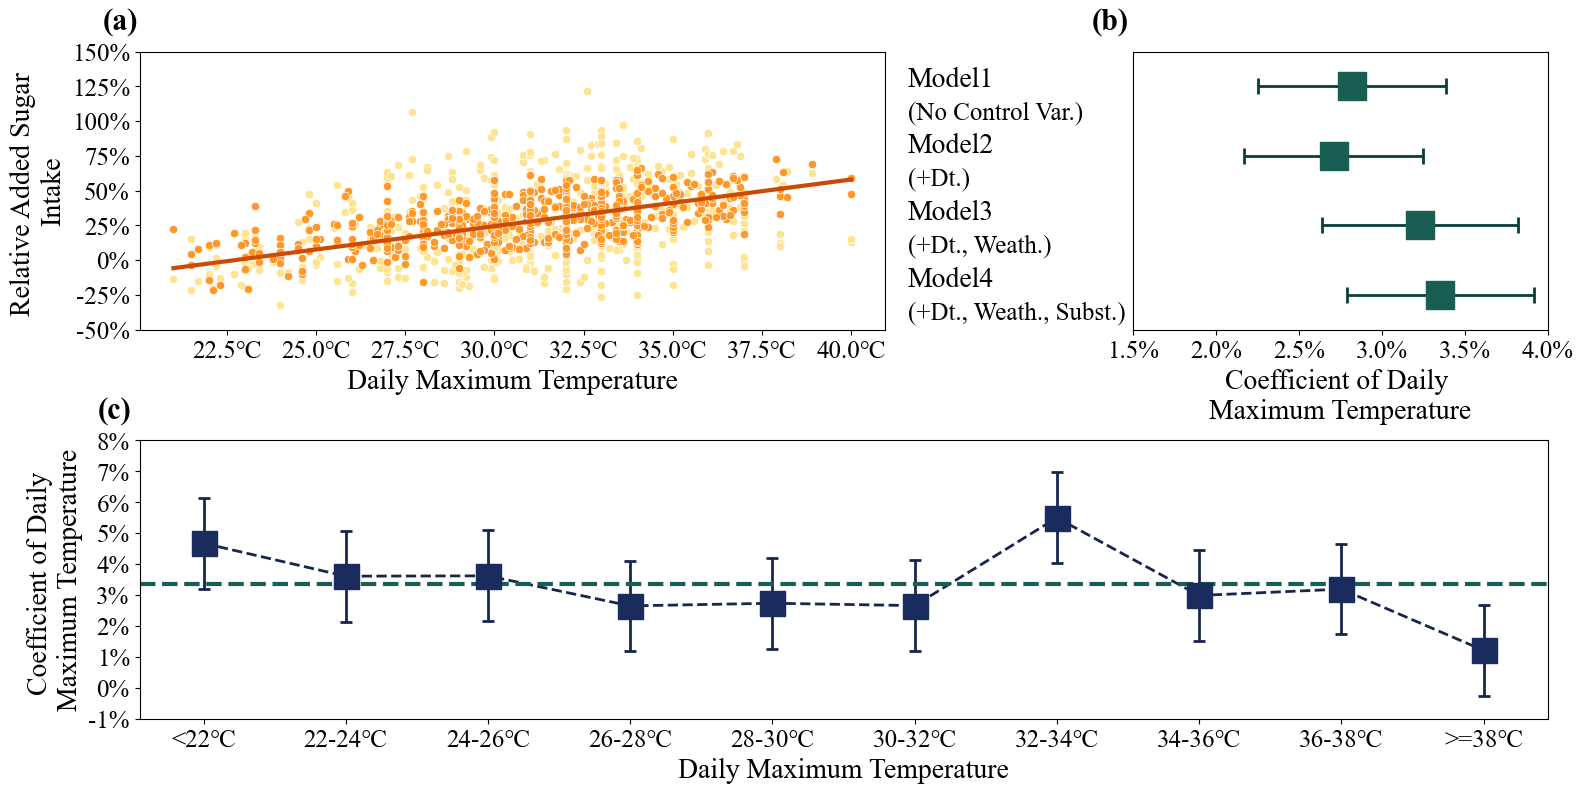

In [32]:
x=[]
y=[]
label_size=20
ticks_size=18
plt.figure(figsize=(16, 8))
plt.rcParams['font.family'] = 'Times New Roman'

plt.subplot2grid((2,9), (1, 0), rowspan=1, colspan=9)
plt.gca().text(-0.03, 1.15, '(c)', transform=plt.gca().transAxes, fontsize=22, va='top', fontweight='bold')
colors = sns.color_palette("gist_heat",10) 
for j, i in enumerate(groups1):
    dy_low, dy_high = hlmf.conf_int().loc['MAX']
    dy = (dy_high - dy_low) / 2
    plt.errorbar(i, hlmf.params['MAX'] + hlmf.random_effects[i]['MAX'], yerr=dy, fmt='s', markersize=18,
                 ecolor='#16264E', color='#192C5D', elinewidth=2, capsize=4, capthick=2)# '#1B7385'
    x.append(i)
    y.append(hlmf.params['MAX'] + hlmf.random_effects[i]['MAX'])

plt.plot(x,y,linestyle='--',color='#16264E',linewidth=2) #'#1B7385'
plt.yticks(fontsize=ticks_size)
plt.xticks(fontsize=ticks_size)
xticks = plt.yticks()
new_y_labels = [f"{int(ytick)}%" for ytick in xticks[0]]
plt.yticks(xticks[0], new_y_labels)
colors = sns.color_palette("YlOrBr",3)  #GnBu,YlOrBr
plt.axhline(y=3.3534, linestyle='--', color='#185E52', linewidth=3)#colors[2]
plt.ylabel('Coefficient of Daily \nMaximum Temperature',fontsize=label_size)
plt.xlabel('Daily Maximum Temperature',fontsize=label_size)
plt.tight_layout()



#**************************figure b**************************#
plt.subplot2grid((2,9), (0, 6), rowspan=1, colspan=3)
plt.gca().text(-0.1, 1.15, '(b)', transform=plt.gca().transAxes, fontsize=22, va='top', fontweight='bold')
for i, j in zip(groups, model):
    dy_low, dy_high = j.conf_int().loc['MAX']
    dy = (dy_high - dy_low) / 2
    # print(j.params['MAX'])
    plt.errorbar(j.params['MAX'] , i, xerr=dy, fmt='s', markersize=20,
                 ecolor='#084038', color='#185E52', elinewidth=2, capsize=6, capthick=2)
plt.yticks(fontsize=ticks_size)
plt.xticks(fontsize=ticks_size)
plt.ylim(-0.5, len(groups)-0.5)
plt.xlim(1.5,4)
xticks = plt.xticks()
new_y_labels = [f"{(xtick)}%" for xtick in xticks[0]]
plt.xticks(xticks[0], new_y_labels)

plt.yticks([])
plt.xlabel('Coefficient of Daily \nMaximum Temperature',fontsize=label_size)
plt.tight_layout()



#**************************figure a**************************#
day_of_week =0
for i in ['Mon', 'Tues', 'Wed', 'Thur', 'Sat', 'Sun']:
    day_of_week+=ols4.params[f'C(week_dt)[T.{i}]']
day_of_week=day_of_week/6
substitution_mean=df['num_dessert_cut'].mean()
RH_mean=df['RH_cut'].mean()
WDSP_mean= df['WDSP_cut'].mean()
PRCP_mean=df['PRCP_cut'].mean()

MAX_data=(df['MAX']*ols4.params['MAX']+RH_mean*ols4.params['RH_cut']+
          ols4.params['num_dessert_cut']*substitution_mean+ols4.params['Intercept']+
          PRCP_mean*ols4.params['PRCP_cut']+WDSP_mean*ols4.params['WDSP_cut']+
          day_of_week
          )
plt.subplot2grid((2,9), (0, 0), rowspan=1, colspan=5)
plt.gca().text(-0.05, 1.15, '(a)', transform=plt.gca().transAxes, fontsize=22, va='top', fontweight='bold')
colors = sns.color_palette("YlOrBr",3)  #GnBu,YlOrBr
COLOR_LIST = sns.color_palette("Set2")

sns.scatterplot(x=df['MAX']+22, y=df['sugar_weight']-100,color=colors[0])
sns.scatterplot(x=df['MAX']+22, y=y_fitted-100,color=colors[1])

sns.lineplot(x=df['MAX']+22,y=MAX_data-100,color=colors[2],linewidth=3)
plt.xlabel('Daily Maximum Temperature',fontsize=label_size)
plt.ylabel('Relative Added Sugar \nIntake',fontsize=label_size)
xticks = plt.xticks()
new_labels = [f"{xtick}℃" for xtick in xticks[0][1:-1]]
plt.xticks(xticks[0][1:-1], new_labels)
plt.xticks(fontsize=ticks_size)
plt.yticks(fontsize=ticks_size)
yticks = plt.yticks()
new_y_labels = [f"{int(ytick)}%" for ytick in yticks[0]]
plt.yticks(yticks[0], new_y_labels)
plt.subplot2grid((2,9), (0, 4), rowspan=1, colspan=1)

lines = [
    {"text": "Model1", "fontsize": 20, "color": 'black'},
    {"text": "(No Control Var.)", "fontsize": 18, "color": 'black'},

    {"text": "Model2", "fontsize": 20, "color": 'black'},
    {"text": "(+Dt.)", "fontsize": 18, "color": 'black'},

    {"text": "Model3", "fontsize": 20, "color": 'black'},
    {"text": "(+Dt., Weath.)", "fontsize": 18, "color": 'black'},

    {"text": "Model4", "fontsize": 20, "color": 'black'},
    {"text": "(+Dt., Weath., Subst.)", "fontsize": 18, "color": 'black'},

]
ax = plt.gca()
ax.set_xlim(0.0,1.8)
ax.axis('off')
y = 0.9
for line in lines:
    plt.text(2.3, y, line["text"], horizontalalignment='left', verticalalignment='center', 
             fontsize=line["fontsize"], color=line["color"], linespacing=1.2)
    y -= 0.12  

plt.subplots_adjust(
    top=0.929,
    bottom=0.095,
    left=0.095,
    right=0.975,
    hspace=0.398,
    wspace=1.0
)

plt.show()
